In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./saved_models/Train_D_G_w60_step1_hid100/standard_beststep_Test_AD_results.csv')

In [4]:
df.index = range(len(df.score))
df['score'] = df['score']

In [49]:
df['threshold'] = 5.0

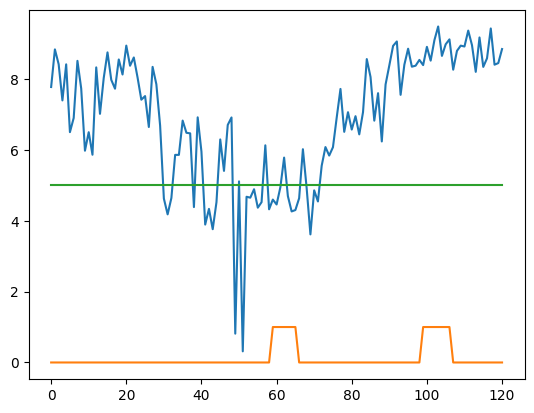

In [50]:
import matplotlib.pyplot as plt

plt.plot(df.index, df.score, label='loss')
plt.plot(df.index, df.true_label, label='y')
plt.plot(df.index, df.threshold, label='threshold')

In [51]:
import seaborn as sns

df['anomaly'] = df.score < df.threshold

anomalies = df[df.anomaly == True]


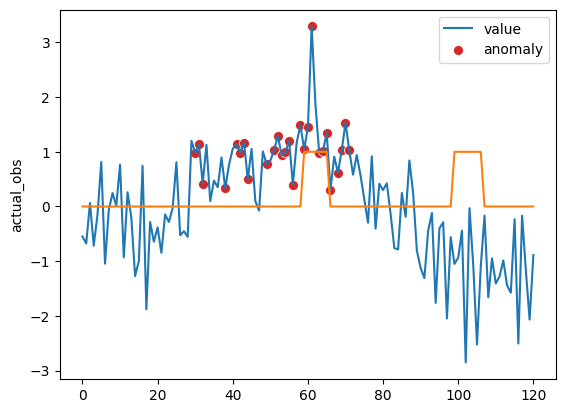

In [52]:
plt.plot(
  range(len(df)), 
  df['actual_obs'], 
  label='value'
)

sns.scatterplot(
  x= anomalies.index,
  y= anomalies.actual_obs,
  color=sns.color_palette()[3],
  s=52,
  label='anomaly'
)
plt.plot(
  range(len(df['true_label'])),
  df['true_label'],
  label='y'
)

In [53]:
import numpy as np
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [54]:
actual = np.array(df['true_label'])
predicted = np.array([int(a) for a in df['anomaly']])

predicted = np.array(predicted)
actual = np.array(actual)

tp = np.count_nonzero(predicted * actual)
tn = np.count_nonzero((predicted - 1) * (actual - 1))
fp = np.count_nonzero(predicted * (actual - 1))
fn = np.count_nonzero((predicted - 1) * actual)

In [55]:
print('True Positive\t', tp)
print('True Negative\t', tn)
print('False Positive\t', fp)
print('False Negative\t', fn)

accuracy = (tp + tn) / (tp + fp + fn + tn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
fmeasure = (2 * precision * recall) / (precision + recall)
cohen_kappa_score = cohen_kappa_score(predicted, actual)
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predicted)
auc_val = auc(false_positive_rate, true_positive_rate)
roc_auc_val = roc_auc_score(actual, predicted)

print('Accuracy\t', accuracy)
print('Precision\t', precision)
print('Recall\t', recall)
print('f-measure\t', fmeasure)
print('cohen_kappa_score\t', cohen_kappa_score)
print('auc\t', auc_val)
print('roc_auc\t', roc_auc_val)

True Positive	 6
True Negative	 85
False Positive	 21
False Negative	 9
Accuracy	 0.7520661157024794
Precision	 0.2222222222222222
Recall	 0.4
f-measure	 0.2857142857142857
cohen_kappa_score	 0.1502808988764045
auc	 0.600943396226415
roc_auc	 0.600943396226415
